In [1]:
from pandas_datareader import data

In [2]:
azo = data.DataReader("AZO", 
                       start='2000-1-1', 
                       end='2020-12-31', 
                       data_source='yahoo')

In [3]:
azo = azo.reset_index()

In [4]:
azo['Year'] = azo['Date'].dt.year
azo['month'] = azo['Date'].dt.month
azo['day'] = azo['Date'].dt.day

In [5]:
def quarter(row):
    if row['month'] == 1 or row['month'] == 2 or row['month'] == 3:
        return 1
    elif row['month'] == 4 or row['month'] == 5 or row['month'] == 6:
        return 4
    elif row['month'] == 7 or row['month'] == 8 or row['month'] == 9:
        return 7
    else:
        return 10

azo['quarter'] = azo.apply(quarter, axis =1)

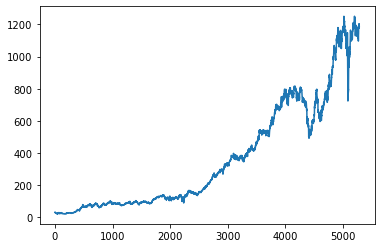

In [6]:
import matplotlib.pyplot as plt
plt.plot(azo['Adj Close'])
plt.show()

In [7]:
import pandas as pd

data = pd.read_csv('data_usa.csv', index_col=0)

data_azo = data[data['year'] >= 2000 ]
data_azo

,DATE,GDP,growth_rate,year,month,jobs,growth_jobs
212,2000-01-01,10002.857,1.045308,2000,1,131005,0.636057
213,2000-04-01,10247.679,2.447521,2000,4,131888,0.674020
214,2000-07-01,10319.825,0.704023,2000,7,132236,0.263860
215,2000-10-01,10439.025,1.155058,2000,10,132351,0.086966
216,2001-01-01,10472.879,0.324302,2001,1,132698,0.262182
...,...,...,...,...,...,...,...
291,2019-10-01,21729.124,0.866119,2019,10,151524,0.404869
292,2020-01-01,21539.689,-0.871802,2020,1,152234,0.468573
293,2020-04-01,19520.114,-9.376064,2020,4,130161,-14.499389
294,2020-07-01,21170.252,8.453526,2020,7,139566,7.225667


In [8]:
azo_final = pd.merge(left = data_azo.reset_index(drop=True), right = azo, left_on = 'month', right_on = 'quarter', how= 'left')

In [9]:
azo_final = azo_final[['Date','GDP','growth_rate','jobs','growth_jobs','High','Low','Open','Close','Volume','Adj Close','quarter','Year','month_y','day']].set_index('Date')

azo_final

,GDP,growth_rate,jobs,growth_jobs,High,Low,Open,Close,Volume,Adj Close,quarter,Year,month_y,day
Date,,,,,,,,,,,,,,
2000-01-03,10002.857,1.045308,131005,0.636057,32.500000,30.500000,32.125000,30.562500,441000,30.562500,1,2000,1,3
2000-01-04,10002.857,1.045308,131005,0.636057,30.937500,30.312500,30.500000,30.437500,490600,30.437500,1,2000,1,4
2000-01-05,10002.857,1.045308,131005,0.636057,30.437500,29.875000,30.312500,30.312500,577400,30.312500,1,2000,1,5
2000-01-06,10002.857,1.045308,131005,0.636057,29.937500,28.937500,29.750000,29.062500,489600,29.062500,1,2000,1,6
2000-01-07,10002.857,1.045308,131005,0.636057,31.125000,29.062500,29.062500,30.437500,472100,30.437500,1,2000,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,21487.896,1.500426,142545,2.134474,1208.010010,1187.130005,1195.939941,1204.219971,82300,1204.219971,10,2020,12,24
2020-12-28,21487.896,1.500426,142545,2.134474,1220.979980,1186.729980,1210.479980,1192.619995,214200,1192.619995,10,2020,12,28
2020-12-29,21487.896,1.500426,142545,2.134474,1197.369995,1172.410034,1192.359985,1177.119995,213800,1177.119995,10,2020,12,29


In [10]:
X = azo_final.drop(['GDP','jobs','Close','Volume'], axis = 1)
y = azo_final['Close']

X_train = X[:105416]
y_train = y[1:105417]

X_test = X[105416:len(X)-1]
y_test = y[105417:]

In [11]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
display(xgb_reg.score(X_test,y_test))
display(xgb_reg.score(X_train,y_train))

[11:11:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9979032132617458

0.9978713942156617

In [12]:
pred = xgb_reg.predict(X_test)

In [13]:
from sklearn.metrics import r2_score


r2_score(y_test, pred)

0.9979032132617458

In [15]:
from sklearn.model_selection import cross_validate

results = cross_validate(xgb_reg,X_train, y_train, cv = 10)


[16:47:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [16]:
results['test_score'].mean()
results['test_score']

array([0.99760755, 0.99736837, 0.99763884, 0.99748885, 0.99746727,
       0.99754035, 0.99755364, 0.99778709, 0.99765013, 0.99787662])

In [14]:
import pickle

pickle.dump(xgb_reg, open('model_azo.p', 'wb'))